### About the Dataset
     --This dataset consists of 101 animals from a zoo.
     --There are 16 variables with various traits to describe the animals.
     --The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

     --The purpose for this dataset is to be able to predict the classification of the animals, based upon the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("D:\ExcelR Data Science\Assignments\KNN\Zoo.csv")

In [3]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
data.shape

(101, 18)

In [5]:
data.drop('animal name',axis=1,inplace=True)

In [6]:
data.shape

(101, 17)

In [7]:
data.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [8]:
data.isnull().any().sum()

0

In [9]:
data.duplicated().any().sum()

1

### Data Visulization

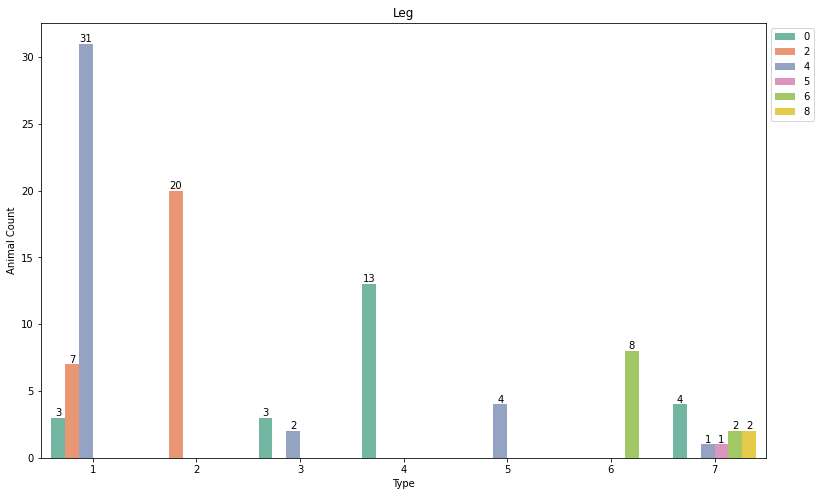

In [10]:
plt.figure(figsize=(13,8))
ax=sns.countplot(data=data,x='type',hue='legs',palette='Set2')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Leg")
plt.xlabel("Type")
plt.ylabel("Animal Count")
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()


<AxesSubplot:xlabel='type', ylabel='count'>

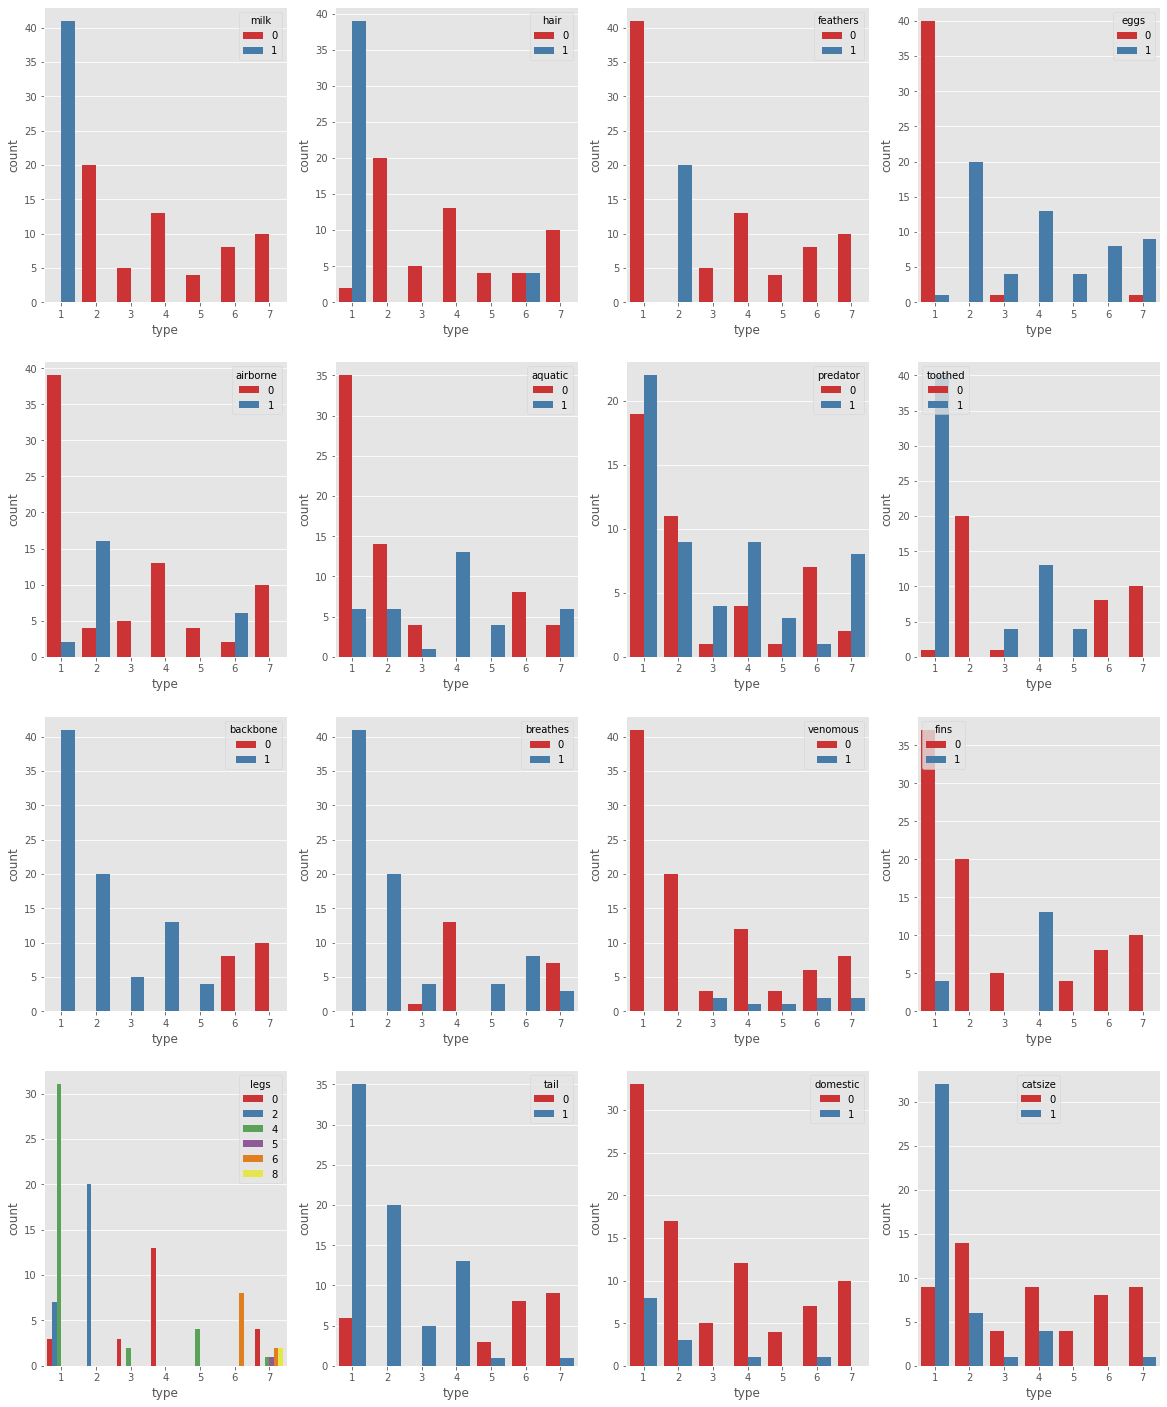

In [11]:
plt.style.use("ggplot")
fig, ax =plt.subplots(4,4, figsize=(20,25)) 

#sns.countplot(data["domestic"], hue="type",palette="viridis", ax=ax[0,0])
sns.countplot(data=data,x='type',hue='milk',palette='Set1',ax=ax[0,0])
sns.countplot(data=data,x='type',hue='hair',palette='Set1',ax=ax[0,1])
sns.countplot(data=data,x='type',hue='feathers',palette='Set1',ax=ax[0,2])
sns.countplot(data=data,x='type',hue='eggs',palette='Set1',ax=ax[0,3])

sns.countplot(data=data,x='type',hue='airborne',palette='Set1',ax=ax[1,0])
sns.countplot(data=data,x='type',hue='aquatic',palette='Set1',ax=ax[1,1])
sns.countplot(data=data,x='type',hue='predator',palette='Set1',ax=ax[1,2])
sns.countplot(data=data,x='type',hue='toothed',palette='Set1',ax=ax[1,3])

sns.countplot(data=data,x='type',hue='backbone',palette='Set1',ax=ax[2,0])
sns.countplot(data=data,x='type',hue='breathes',palette='Set1',ax=ax[2,1])
sns.countplot(data=data,x='type',hue='venomous',palette='Set1',ax=ax[2,2])
sns.countplot(data=data,x='type',hue='fins',palette='Set1',ax=ax[2,3])

sns.countplot(data=data,x='type',hue='legs',palette='Set1',ax=ax[3,0])
sns.countplot(data=data,x='type',hue='tail',palette='Set1',ax=ax[3,1])
sns.countplot(data=data,x='type',hue='domestic',palette='Set1',ax=ax[3,2])
sns.countplot(data=data,x='type',hue='catsize',palette='Set1',ax=ax[3,3])

# The 7 Class Types are:

1. Mammal

2. Bird

3. Reptile

4. Fish

5. Amphibian

6. Bug

7. Invertebrate

In [33]:
import plotly.express as px
labels = ["Type 1","Type 2","Type 3","Type 4","Type 5","Type 6","Type 7"]
values = data['type'].value_counts().tolist()

px.pie(data, values=values, names=labels, title="Class Type Distribution Pie Chart")


In [16]:
from collections import Counter
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(data))))  

The dataset contains 10 observations with more than 2 outliers


<AxesSubplot:>

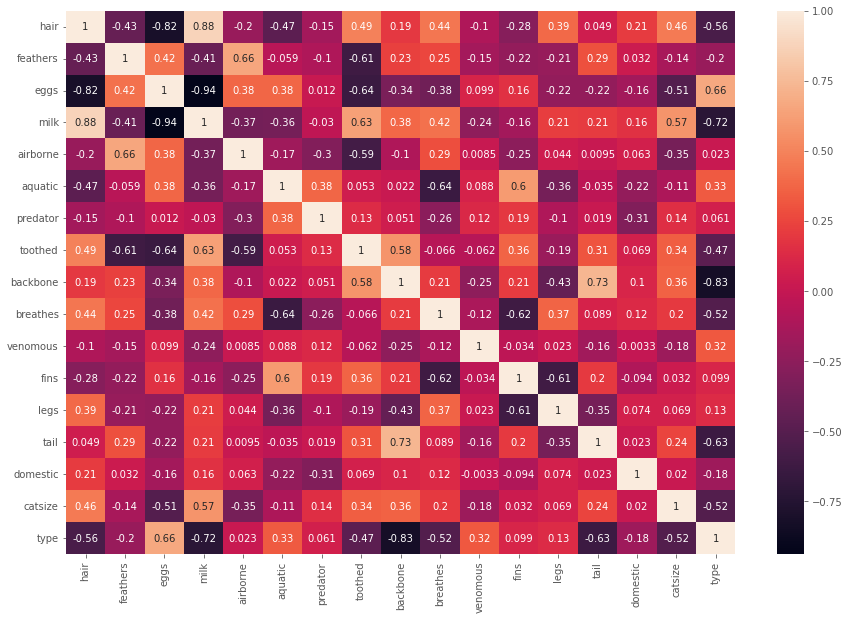

In [17]:
plt.figure(figsize=(15,10))

sns.heatmap(data.corr(),annot=True)

##### We can conclude that no features are highly correlated with each other
#### Standardizing the Dataset

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(data)


array([[ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  0.55839574],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  1.99224243],
       [-0.86103386,  2.01246118,  0.84372057, ..., -0.38435306,
        -0.87859537, -0.39750205]])

In [19]:
x=data.iloc[:,:-1]
print(x.shape)
y=data['type']
print(y.shape)

(101, 16)
(101,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=42)

In [30]:
classifier=KNeighborsClassifier(n_neighbors=4)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [32]:
from sklearn import metrics

matrix=metrics.confusion_matrix(y_test,y_pred)

score=metrics.accuracy_score(y_test,y_pred)
print('The accuracy of this model is: ',score)
print(metrics.classification_report(y_test,y_pred))

the accuracy of this model is:  0.9230769230769231
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       0.80      1.00      0.89         4
           7       1.00      0.50      0.67         2

    accuracy                           0.92        26
   macro avg       0.78      0.79      0.77        26
weighted avg       0.91      0.92      0.90        26

